In [162]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [163]:
import numpy as np
import pandas as pd

In [164]:
import datetime as dt

In [165]:
from sqlalchemy import create_engine
from sqlalchemy import Column, Integer, String, Float

from sqlalchemy.ext.declarative import declarative_base
Base = declarative_base()

from sqlalchemy import create_engine, inspect

# Reflect Tables into SQLAlchemy ORM

In [166]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [167]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
conn = engine.connect()

In [168]:
# reflect an existing database into a new model

Base = automap_base()
# reflect the tables

Base.prepare(engine, reflect=True)

In [169]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [249]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [194]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [195]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
#First figure out current date
session.query(Measurement.date).order_by(Measurement.date.desc()).first()


('2017-08-23')

In [196]:
# Calculate the date 1 year ago from the last data point in the database
#Use Dimetdat to get date one year ago 
one_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(one_year)

2016-08-23


In [197]:
# Perform a query to retrieve the data and precipitation scores

#BUT THIS ALL ALL NOT ONE YEAR 
data = pd.read_sql("SELECT * FROM Measurement", conn)
data.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [198]:
#precipitation scores for past year - be sure to ADD \.
# Filer out one year of data 
precip = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > one_year).\
    order_by(Measurement.date).all()

#Make DF
precip_df = pd.DataFrame(precip)
precip_df.head()



,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22


In [199]:
# Save the query results as a Pandas DataFrame and set the index to the date column

precip_sort = precip_df.set_index('date').head()
precip_sort.head()



,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22


In [200]:
# Sort the dataframe by date
precip_sort = precip_df.sort_values(by="date").dropna()
precip_sort.tail()

,date,prcp
2218,2017-08-22,0.50
2221,2017-08-23,0.08
2219,2017-08-23,0.00
2220,2017-08-23,0.00
2222,2017-08-23,0.45


In [201]:
#normalize data

#precip_sort = pd.DataFrame({"Date": [], "prcp": []})

#column_maxes = precip_sort.max()
#precip_sort_max = column_maxes.max()
#precip_sort_normalized_df = df / df_max

#print(precip_sort_normalized_df)

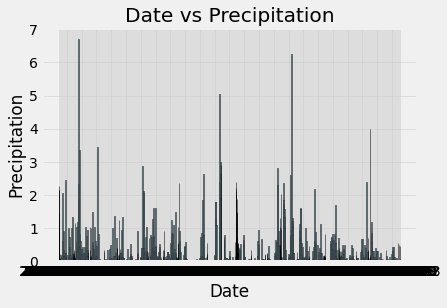

In [202]:
# Use Pandas Plotting with Matplotlib to plot the data
# Create Date vs. Prcp Plot scatter plot
plt.bar(precip_sort['date'], precip_sort["prcp"], facecolor = "lightblue", edgecolor = "black")
#print(precip_sort['date'])
#precip_sort
# Set title/
plt.title("Date vs Precipitation")

# Set x axis label
#FIX DATES
plt.xlabel("Date")

# Set y axis label
plt.ylabel("Precipitation")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
#plt.savefig("../City Latitude vs Max Temperature.png")


In [203]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_sort.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [204]:
# Design a query to show how many stations are available in this dataset?

Avaliable_stations = session.query(Station).count()
Avaliable_stations

9

In [205]:
#Create inspector 
inspector = inspect(engine)
inspector.get_table_names()


['measurement', 'station']

In [206]:
#names of table w/i db
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurement', 'station']

In [278]:
# List column names and types 
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [242]:
# What are the most active stations? (i.e. what stations have the most rows)?

Active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
Active_stations

#Active_statons = pd.DataFrame(Active_stations)

# List the stations and the counts in descending order.

#Most_active = session.query(Station, func.count(Station)).\
##Creat Df if time     
#Active_stations_df = pd.DataFrame({
 #   "Station": Station,
  #  "Count": Measurement.station
    
#})
#Active_stations_df.head()


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [273]:
# Using the station id from the previous query,
Most_Avtive = Active_stations[0][0]
print (Most_Avtive)



USC00519281


In [283]:

#Wht wont any of these print?
#calculate the lowest temperature recorded, Join 
Most_Avtive_Cold = session.query(func.min(Measurement.tobs)).\
Most_Avtive_Cold
# highest temperature recorded, and 
Most_Avtive_Hot = session.query((Measurement.station).func.max(measurement.tobs).\
#average temperature of the most active station?
Avg_station = session.query(Measurement.tobs). func.avg(Measurement.tobs).\

AttributeError: 'Query' object has no attribute 'Most_Avtive_Cold'

In [260]:
##WHAT AM I MISSING WITH THE PRINTING 
# Choose the station with the highest number of temperature observations.
Most_tobs = session.query(Measurement.station),func.max(Measurement.tobs)
print(Most_tobs)


(<sqlalchemy.orm.query.Query object at 0x000001B7C19B26D8>, <sqlalchemy.sql.functions.max at 0x1b7c3411198; max>)


In [261]:


# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
#SELECT * FROM Station.USC00519281
#one_year = dt.date(2017, 7, 23) - dt.timedelta(days=365)
#print(one_year)

#Twelve_months = Session.query(measurement.station, measurement.tobs)
Twelve_months = Session.query(Measurement.station, Measurement.tobs).\
        filter(Measurement.station == Most_Active).\
        filter(Measurement.date >= last_twelve_months).all()
Twelve_months_df = pd.DataFrame(Twelve_months)
Twelve_months_df.set_index('Measurement', inplace=True)
Twelve_months_df

AttributeError: Neither 'InstrumentedAttribute' object nor 'Comparator' object associated with measurement.station has an attribute '_query_cls'

In [262]:
today = dt.date.today()
delta = dt.timedelta(days =7)
today - delta

datetime.date(2020, 10, 31)

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
